# Class 12: Mapping

Plan for today:
- Creating maps


## Notes on the class Jupyter setup

If you have the *ydata123_2024a* environment set up correctly, you can get the class code using the code below (which presumably you've already done given that you are seeing this notebook). 

In [2]:
import YData

# YData.download.download_class_code(11)   # get class code    
# YData.download.download_class_code(11, True)  # get the code with the answers 

YData.download_data("dennys.csv")

YData.download.download_data("States_shapefile.geojson")
YData.download.download_data("state_demographics.csv")
YData.download.download_data("ne_110m_graticules_10.prj")
YData.download.download_data("ne_110m_graticules_10.shp")
YData.download.download_data("ne_110m_graticules_10.shx")
YData.download.download_data("ne_110m_graticules_10.dbf")


There are also similar functions to download the homework:

In [3]:
#YData.download.download_homework(5)  # downloads the homework 

If you are using colabs, you should install the YData packages by uncommenting and running the code below and run the code below to mount the your google drive.

In [4]:
# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Spatial mapping with geopandas

Visualizing spatial data through maps is another powerful way to see trends in data. There are several mapping packages in Python. Here we will use the geopandas package to create maps. 

The geopandas package defines a geopandas DataFrame, which is the same as a pandas DataFrame but has an additional column called `geometry` which specifies geographic information. 

Let's explore this now!


### Visualizing boundaries

Let's start by looking some geopanda DataFrames and visualizing some geometric boundaries.

Below we load the gapminder data again and get the gapminder data from 2007. We also show which maps come with geopandas. 


In [6]:
import geopandas as gpd
import plotly.express as px

gapminder_2007 = px.data.gapminder().query("year == 2007")   # the plotly package comes with the gapminder data


# see which maps come with geopandas
gpd.datasets.available


['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Let's get a geopandas DataFrame that has th countries in the world...

In [7]:
# View the world geopandas DataFrame

# turn off deprecation warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# read data into a geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# print the data type
print(type(world))

# look at the first few rows of the data
world.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


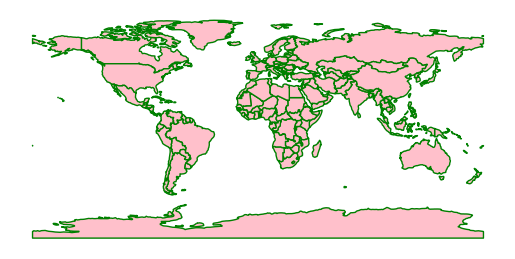

In [8]:
# Plot a world map with particular properties

ax = world.plot(color = "pink", edgecolor = "green");

ax.set_axis_off();


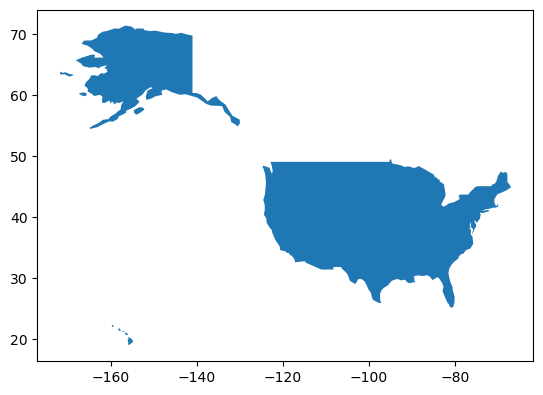

In [9]:
# Plot just the United States

world.query("name == 'United States of America'").plot();


### Coordinate reference systems and projections

A coordinate reference system (CRS) is a framework used to precisely measure locations on the surface of the Earth as coordinates. The goal of any spatial reference system is to create a common reference frame in which locations can be measured precisely and consistently as coordinates, which can then be shared unambiguously, so that any recipient can identify the same location that was originally intended by the originator.

There are two different types of coordinate reference systems: Geographic Coordinate Systems and Projected Coordinate Systems. [Projected coordinate systems](https://en.wikipedia.org/wiki/List_of_map_projections) map 3D coordinates into a 2D plane so they can be plotted. Different projected coordiate systems perserve different properties, such as keeping all angles intact which is usefor for navigation (e.g., the Mercator projection) or keeping the size of land areas intact (e.g., the Eckert IV projection). 

A detailed discussion of CRS is beyond the scope of the class. But for the purposes of this class, it is just important that all layers in a map are using the same project (otherwise, for example, data points representing cities and the underlying spatial map won't line up). 

Let's very briefly explore different map projections... 


In [10]:
# Read Graticules (lines on a map)
graticules = gpd.read_file("ne_110m_graticules_10.shp")
print(graticules.crs)
graticules.head(3)

EPSG:4326


,degrees,direction,display,dd,ScaleRank,geometry
0,80,N,80 N,80.0,6,"LINESTRING (180.00000 79.99848, 179.99664 79.9..."
1,70,N,70 N,70.0,6,"LINESTRING (180.00000 69.99847, 179.99664 69.9..."
2,60,N,60 N,60.0,6,"LINESTRING (180.00000 59.99866, 179.99664 59.9..."


EPSG:4326


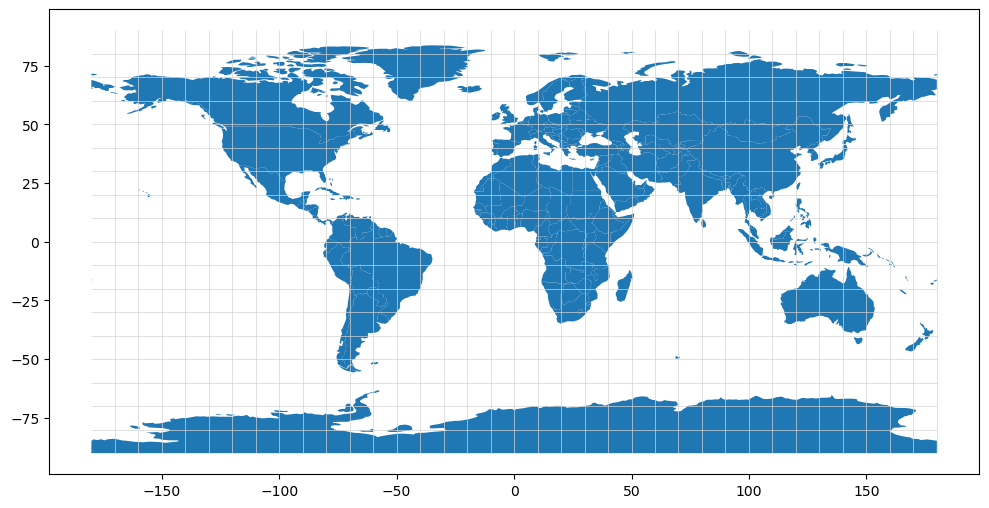

In [11]:
# Web Mercator projection - perserves angles (EPSG:4326 projection)

print(world.crs) # print the default CRS


# plot the map
fig, ax = plt.subplots(figsize=(12,10))
world.plot(ax = ax);
graticules.plot(ax=ax, color="lightgray", linewidth=0.5);

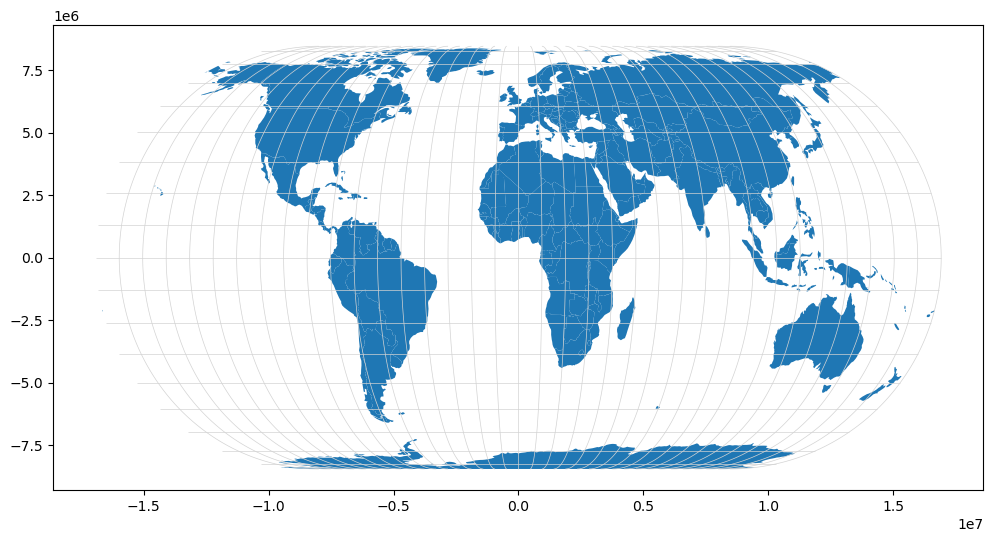

In [12]:
# Eckert IV is an equal-area projection  ("ESRI:54012")

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54012").plot(ax = ax);
graticules.to_crs("ESRI:54012").plot(ax=ax, color="lightgray", linewidth=0.5);

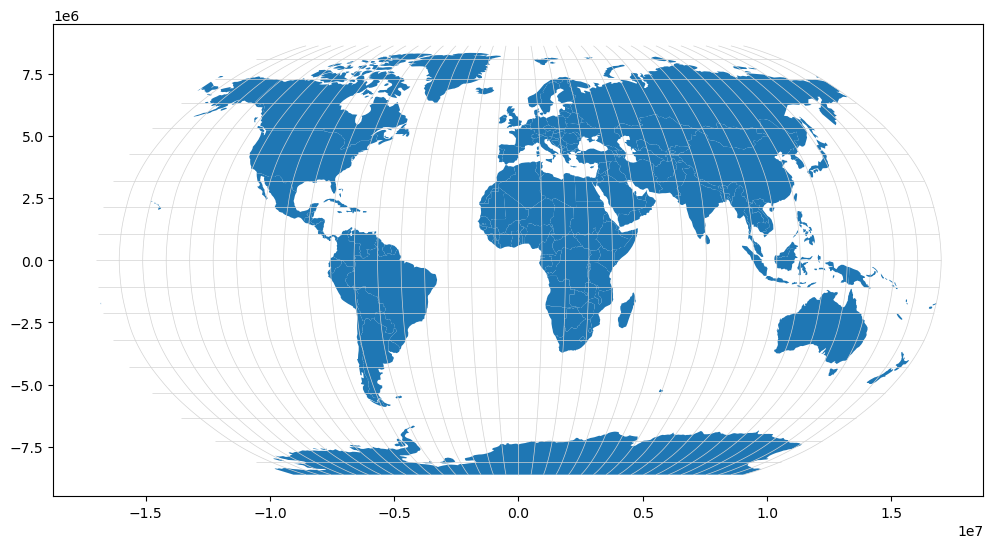

In [13]:
# Robinson projection - neither equal-area nor conformal ("ESRI:54030") 

fig, ax = plt.subplots(figsize=(12,10))
world.to_crs("ESRI:54030").plot(ax = ax);
graticules.to_crs("ESRI:54030").plot(ax=ax, color="lightgray", linewidth=0.5);

To learn more about "What your favorite map projection says about you" see: https://xkcd.com/977/

### Maps with layers and markers

We can also plot points on a map. When doing so, it's important that the points and the underlying map use the same coordinate reference system (CRS).

Let's add Denny's locations to the map of the United States!


In [14]:
# Let's start by getting a map of just the United States

state_map = world.query("name == 'United States of America'")

state_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


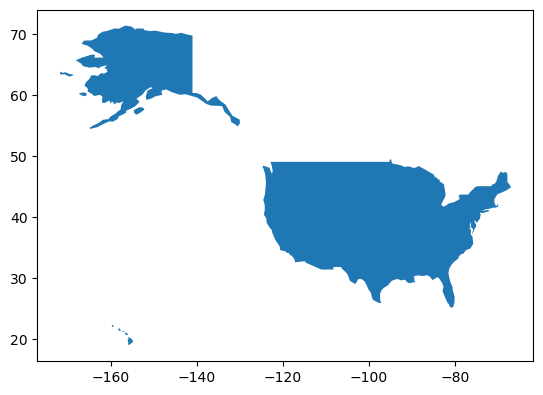

In [15]:
# visualize just the United States

state_map.plot();


In [16]:
# Get the coordinate reference system (CRS) for our map

print(state_map.crs)

EPSG:4326


Let's now load our Denny's data!

In [17]:
# Let's load our Denny's data
dennys = pd.read_csv("dennys.csv")
dennys.head(3)

,Unnamed: 0,address,city,state,zip,longitude,latitude
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366


To convert longitude and latitude coordinates into geometric objects; i.e., we will convert them into Shaply objects.  We can use the `gpd.points_from_xy(long, lat)` function. 

In [18]:
# Let's convert our longitude and latitude coordinates into geometric (Shapely) objects 

dennys_geometries = gpd.points_from_xy(dennys["longitude"], dennys["latitude"])
dennys_geometries[0:5]

<GeometryArray>
[<POINT (-149.877 61.195)>,  <POINT (-149.809 61.21)>,
  <POINT (-147.76 64.837)>,  <POINT (-85.468 32.603)>,
  <POINT (-86.832 33.562)>]
Length: 5, dtype: geometry

In [19]:
# Let's now convert out data into a geopandas DataFrame

dennys_gpd = gpd.GeoDataFrame(dennys, geometry=dennys_geometries)
dennys_gpd.head(3)

,Unnamed: 0,address,city,state,zip,longitude,latitude,geometry
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,POINT (-149.87670 61.19530)
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,POINT (-149.80900 61.20970)
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,POINT (-147.76000 64.83660)


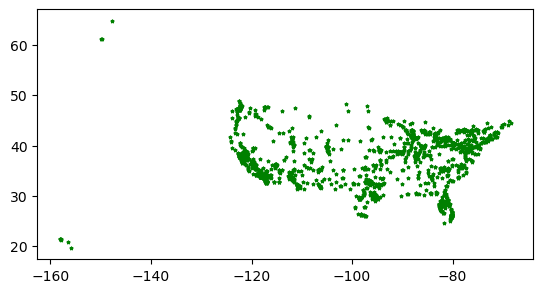

In [20]:
# We can plot the location of the Denny's using the plot function

dennys_gpd.plot(marker='*', color='green', markersize=5);


In [21]:
# Let's check the CRS

print(dennys_gpd.crs)


None


Before plotting data, we should set the appropriate coordinate reference system (CRS). This is partlcularly imporant when we are combining different layers on a map, such as putting city locations on the map that has the outlines of regional borders. 

The CRS that uses longitude and latitude coordinates is the [World Geodetic System 1984 (WGS84)](https://epsg.io/4326). This system is often referred to by its EPSG Geodetic Parameter Dataset code which is `4326`. 

Thus, we should set the set coordinate system to be EPSG 4326. We can do this using the method `.set_crs(4326)`. Let's set this on our `dennys_gpd` DataFrame. 


In [22]:
# Let's set the CRS to match the CRS of our map (which is EPSG 4326)

dennys_gpd = dennys_gpd.set_crs(4326)

print(dennys_gpd.crs)

dennys_gpd.head(3)

EPSG:4326


,Unnamed: 0,address,city,state,zip,longitude,latitude,geometry
0,1,2900 Denali,Anchorage,AK,99503,-149.8767,61.1953,POINT (-149.87670 61.19530)
1,2,3850 Debarr Road,Anchorage,AK,99508,-149.8090,61.2097,POINT (-149.80900 61.20970)
2,3,1929 Airport Way,Fairbanks,AK,99701,-147.7600,64.8366,POINT (-147.76000 64.83660)


Now that we have our Denny's location in the same coordinate system as our map, we can add the points to the map. 

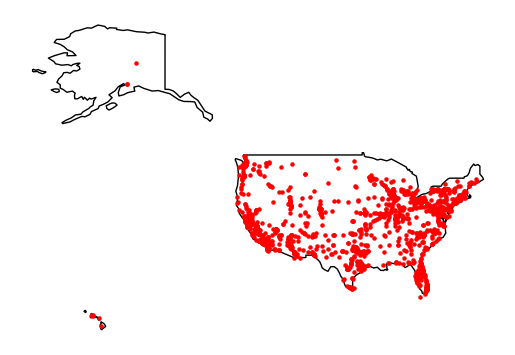

In [23]:
#state_map = gpd.read_file("States_shapefile.geojson")

base = state_map.plot(color='white', edgecolor='black')

ax = dennys_gpd.plot(ax=base, color='red', markersize=5);

ax.set_axis_off();

### Choropleth maps

In choropleth maps, predefined regions are filled in with colors based values of interest. 

Typically to create a choropleth map we join data of interest onto a map. 

Let's explrore this now...


In [24]:
# Join the gapminder data onto our world map

world2 = world.merge(gapminder_2007, left_on = "iso_a3", right_on = "iso_alpha")
world2.head(3)

,pop_est,continent_x,name,iso_a3,gdp_md_est,geometry,country,continent_y,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,Africa,2007,52.517,38139640,1107.482182,TZA,834
1,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,Americas,2007,80.653,33390141,36319.235010,CAN,124
2,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,Americas,2007,78.242,301139947,42951.653090,USA,840


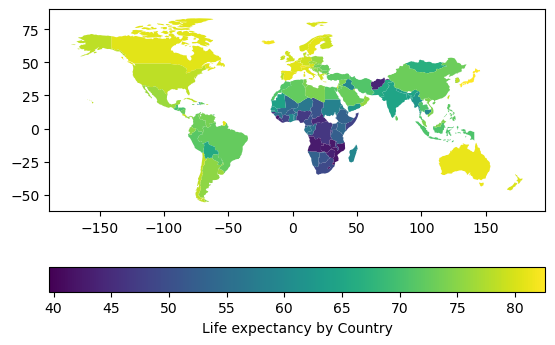

In [25]:
# Plot a choropleth map of life expectancy

world2.plot(column='lifeExp', legend = True,
           legend_kwds={'label': "Life expectancy by Country",
                        'orientation': "horizontal"});

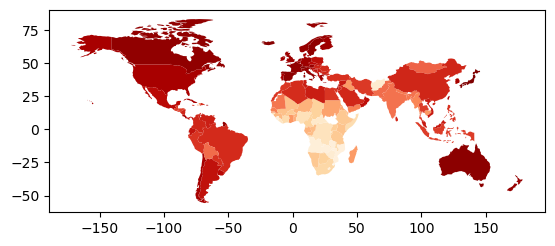

In [26]:
# Change the color scale

world2.plot(column='lifeExp', cmap='OrRd');

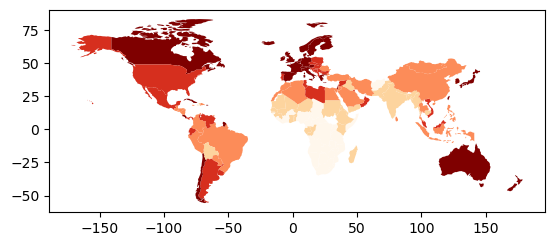

In [27]:
# We can plot quantiles

world2.plot(column='lifeExp', cmap='OrRd', scheme='quantiles');

### Anorther choropleth map example

Let's fit a choropleth map examining which states in the USA are growing in terms of people having lots of childern. 

Any thoughts on which state this might be? 

To start, let's load a map with the outlines of the states in the USA, and load demographic data.

In [28]:
state_map = gpd.read_file("States_shapefile.geojson")

print(state_map.crs)

state_map.head(3)

EPSG:4326


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907..."
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824..."
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0..."


In [29]:
# load demographic data on the states

state_demographics = pd.read_csv("state_demographics.csv")
state_demographics.head(3)

,State,under_5,over_64,bachelors_degree,total
0,Alabama,295811.997,741954.681,1095959.202,4849377
1,Alaska,54518.168,69252.808,202601.300,736732
2,Arizona,430814.976,1070305.956,1810769.196,6731484


In [30]:
# In order to join the DataFrames, we need to make sure the states have the same capitalization

state_demographics2 = state_demographics.copy()
state_demographics2["State"] = state_demographics["State"].apply(str.upper)

state_demographics2.head()

,State,under_5,over_64,bachelors_degree,total
0,ALABAMA,295811.997,741954.681,1.095959e+06,4849377
1,ALASKA,54518.168,69252.808,2.026013e+05,736732
2,ARIZONA,430814.976,1070305.956,1.810769e+06,6731484
3,ARKANSAS,192813.985,465719.933,5.962402e+05,2966369
4,CALIFORNIA,2522162.500,5005522.500,1.191237e+07,38802500


In [31]:
# Join the demographic information on to the the USA map

state_map_demo = state_map.merge(state_demographics2, 
                                 left_on = "State_Name", right_on = "State")
state_map_demo.head(3)

,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,State,under_5,over_64,bachelors_degree,total
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",ALABAMA,295811.997,741954.681,1095959.202,4849377
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",ALASKA,54518.168,69252.808,202601.300,736732
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",ARIZONA,430814.976,1070305.956,1810769.196,6731484


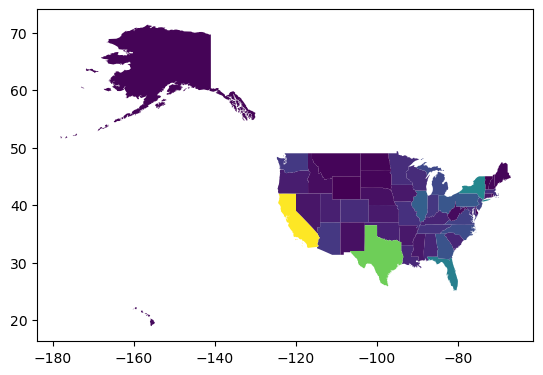

In [32]:
# Let's plot the map 

state_map_demo.plot(column = "under_5");


Is there anything [wrong with this map](https://xkcd.com/1138/)? 

In [33]:
# Let's look at the proportion of people under the age of 5

state_map_demo2 = state_map_demo.copy()

state_map_demo2["percent_under_5"] = 100 * state_map_demo["under_5"]/state_map_demo["total"]

state_map_demo2.head(3)


,FID,Program,State_Code,State_Name,Flowing_St,FID_1,geometry,State,under_5,over_64,bachelors_degree,total,percent_under_5
0,1,PERMIT TRACKING,AL,ALABAMA,F,919,"POLYGON ((-85.07007 31.98070, -85.11515 31.907...",ALABAMA,295811.997,741954.681,1095959.202,4849377,6.1
1,2,,AK,ALASKA,N,920,"MULTIPOLYGON (((-161.33379 58.73325, -161.3824...",ALASKA,54518.168,69252.808,202601.300,736732,7.4
2,3,AZURITE,AZ,ARIZONA,F,921,"POLYGON ((-114.52063 33.02771, -114.55909 33.0...",ARIZONA,430814.976,1070305.956,1810769.196,6731484,6.4


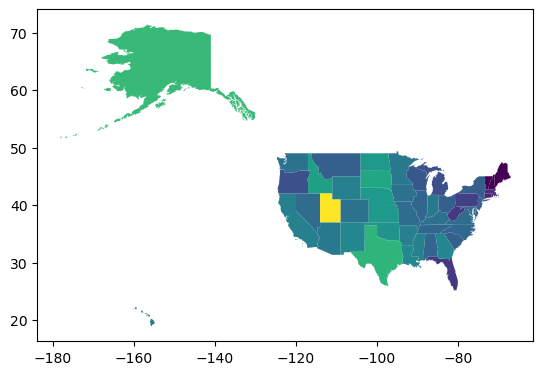

In [34]:
# Let's plot the new map

state_map_demo2.plot(column = "percent_under_5");
